In [544]:
from core.fr_1989_analysis import *
import pandas as pd
from transformers import BertTokenizer
import matplotlib.pyplot as plt
import seaborn as sns

IMPORTANT: due to shared variable names, run the cells for each experiment from the top.

# Experiment 1 

This experiment measured reading time on the disambiguating token for when it came immediately after an ambiguous word vs. when it was preceded by filler context.

Conditions: a = dominant-early; b = subordinate-early; c = dominant-late; d = subordinate-late.
dominant/subordinate refers to sense, early/late refers to when the disambiguating token comes in relation to the target.


Example Stimuli: Target tokens in **bold**, disambiguating tokens in *italics*.

a. Tom was unhappy that the **fall** *arrived* so early.

b. Tom was unhappy that the **fall** *hurt* Sue's back permanently.

c. Tom was unhappy that the **fall** had seemed to *arrive* so
early.

d. Tom was unhappy that the **fall** had seemed to *hurt* Sue's


In [526]:
df = pd.read_csv("../data/expt_1_stimuli.csv")
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
df['dt_stem'] = df['disambig_token'].apply(lambda t: tokenizer.tokenize(t)[0])
a = df[(df['d_s'] == 'd') & (df['early_late'] == 'early')]
b = df[(df['d_s'] == 's') & (df['early_late'] == 'early')]
c = df[(df['d_s'] == 'd') & (df['early_late'] == 'late')]
d = df[(df['d_s'] == 's') & (df['early_late'] == 'early')]

In [528]:
a_data, c_data = sentence_pair_comparison(a, c, 9)

These are the layers where the disambiguating token has the most attention for stimuli A and C. B and D are done in the cell below the next one.

In [537]:
a_attn, a_embeds = first_item(a_data), second_item(a_data)
c_attn, c_embeds = first_item(c_data), second_item(c_data)
top_layers(a_attn, c_attn)

[{5, 7},
 {0},
 {0, 3, 4},
 set(),
 {7},
 {3},
 {0, 4},
 {5, 7},
 {0},
 {4, 5},
 {3},
 {3, 4, 5, 7},
 {0, 5},
 {3, 4, 5},
 {4},
 {3, 4}]

In [538]:
b_data, d_data = sentence_pair_comparison(b, d, 9)
b_attn, b_embeds = first_item(b_data), second_item(b_data)
d_attn, d_embeds = first_item(b_data), second_item(b_data)
top_layers(b_attn, d_attn)

[{0, 1, 2, 3, 4, 5, 7},
 {2, 3, 4, 5, 7},
 {0, 2, 6},
 {0, 2, 5, 7},
 {0, 2, 5, 7},
 {2},
 {2, 4, 5},
 {0, 2, 5, 8},
 {2, 4, 5},
 {2, 5},
 {2, 5},
 {0, 2, 4, 5, 6, 7},
 {2, 7},
 {2, 4, 5, 7},
 {0, 2, 3, 4, 5, 7, 8},
 {1, 2, 4, 5, 7}]

In [407]:
no_gap = a_attn + b_attn
gap = c_attn + d_attn

In [431]:
ng_layers = []
g_layers = []
ng_attn = []
g_attn = []
for ab, cd in zip(no_gap, gap):
    for l1, l2 in zip(ab.keys(), cd.keys()):
        ng_layers.append(l1)
        g_layers.append(l2)
        ng_attn.append(ab[l1]['attn_vector'][ab[l1]['hc_token_idx']])
        g_attn.append(cd[l2]['attn_vector'][cd[l2]['hc_token_idx']])

Text(0.5, 1.0, 'Attention on Disambiguating Token')

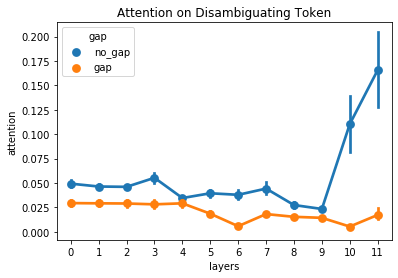

In [438]:
dis_attn = pd.DataFrame({'layers': ng_layers + g_layers, "attention": ng_attn + g_attn,
              "gap": ['no_gap'] * len(ng_layers) + ['gap'] * len(g_layers)})
sns.pointplot(x = 'layers', y = 'attention', hue = 'gap', data = dis_attn)
plt.title("Attention on Disambiguating Token")

`no_gap` refers to Sentences a and b (i.e. Larry knew that the suit fit him very well.), `gap` refers to Sentences c and d (Larry knew that the suit would have to fit him very well.)

Cosine similarity between pairs of stimuli with the same sense/different distances to disambiguating token

In [539]:
no_gap_embeds = a_embeds + b_embeds
gap_embeds = c_embeds + d_embeds
avg_pairwise_cosine_sim(no_gap_embeds, gap_embeds)

0.98095644

Cosine similarity between pairs of stimuli with different senses/same distance to disambiguating token

In [541]:
dom_embeds_1 = a_embeds + c_embeds
sub_embeds_1 = b_embeds + d_embeds
avg_pairwise_cosine_sim(dom_embeds_1, sub_embeds_1)

0.7917545

# Experiment 2

This experiment measured reading time for sentences where the disambiguating context came before an ambiguous word vs. after the token.

a — dominant-prior, b = subordinate-prior; c = dominant-follow- ing; d = subordinate-following.
dominant/subordinate refers to sense, prior/following refers to the position of the disambiguating information.

Example stimuli: target token in **bold**, disambiguating context in *italics*

a. *Apologizing for their behavior*, the **club** was virtually useless.

b. *Weighing almost thirty pounds*, the **club** was virtually useless.

c. Unfortunately the **club** was virtually useless, *apologizing for their behavior.*

d. Unfortunately the **club** was virtually useless, *weighing almost thirty pounds.*


In [502]:
df = pd.read_csv("../data/expt_2_stimuli.csv")
df['dt_stem'] = df['disambig_token'].apply(lambda t: tokenizer.tokenize(t)[0])
a = df[(df['d_s'] == 'd') & (df['before_after'] == 'before')]
b = df[(df['d_s'] == 's') & (df['before_after'] == 'before')]
c = df[(df['d_s'] == 'd') & (df['before_after'] == 'after')]
d = df[(df['d_s'] == 's') & (df['before_after'] == 'after')]

In [505]:
a_data, c_data = sentence_pair_comparison(a, c, 13)
a_attn, a_embeds = first_item(a_data), second_item(a_data)
c_attn, c_embeds = first_item(c_data), second_item(c_data)
b_data, d_data = sentence_pair_comparison(b, d, 13)
b_attn, b_embeds = first_item(b_data), second_item(b_data)
d_attn, d_embeds = first_item(d_data), second_item(d_data)


In [507]:
d_before = a_attn + b_attn
d_after = c_attn + d_attn

In [508]:
embeds_before = a_embeds + b_embeds
embeds_after = c_embeds + d_embeds

The average cosine similarity of pairs of A and C & B and D sentences is higher than when the sense is different.
So here, we see that the location of the disambiguating context does not play a significant role in the word's representation. 

In [509]:
avg_pairwise_cosine_sim(embeds_before, embeds_after)

0.960975

In [510]:
dom_embeds = a_embeds + c_embeds
sub_embeds = b_embeds + d_embeds

In [511]:
avg_pairwise_cosine_sim(dom_embeds, sub_embeds)

0.88935876

These graphs plot the total attention before/after the target token. One issue that we were running into was that when we take the mean, the results don't look like what we should expect, but when we take the sum, there are much fewer tokens before the target. This is particularly an issue for stimulus categories c and d, but isn't much of a problem for a and b.


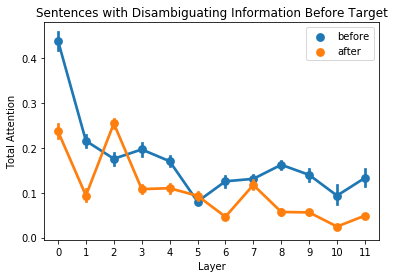

In [546]:
ab_before, ab_after, layers = attn_before_after(d_before, 
                                             "Sentences with Disambiguating Information Before Target")

Example sentence: Being so elegantly designed, the pitcher pleased Mary. (a and b)

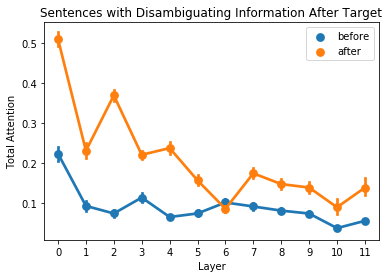

In [547]:
cd_before, cd_after, cd_layers = attn_before_after(d_after,"Sentences with Disambiguating Information After Target")

Example sentence: Of course the pitcher pleased Mary, being so elegantly designed. (c and d)

Something to do- Linear Model: before/after(binary), number of tokens before/after. Layers as non-continuous factor. Outcome variable is sum/mean of attention